# **AI-generated Text Detection**

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import string
import nltk
from nltk.corpus import stopwords
warnings.filterwarnings(action='ignore')

## Reading Datasets

In [4]:
df = pd.read_csv('Dataset\AIHuman.csv')

In [5]:
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0


## Data Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490271 entries, 0 to 490270
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       490271 non-null  object
 1   generated  490271 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.5+ MB


Text(0.5, 0, 'AI-generated')

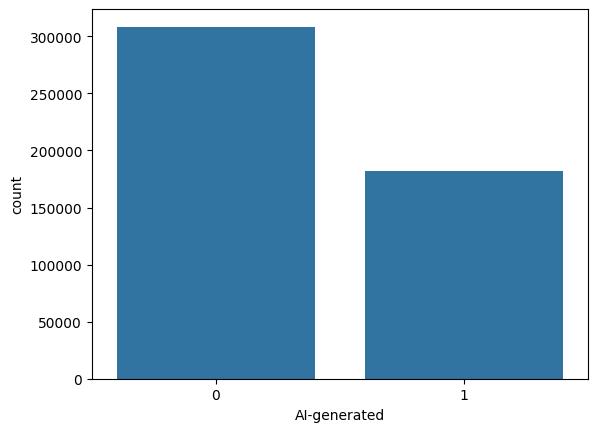

In [7]:
plot = sns.countplot(data=df,x='generated')
plot.set_xlabel('AI-generated')

In [8]:
print('Total Texts:', len(df))
print('Human-generated Texts:', len(df[df['generated'] == 0]))
print('AI-generated Texts:', len(df[df['generated'] == 1]))

Total Texts: 490271
Human-generated Texts: 308435
AI-generated Texts: 181836


## Data Preparation

### Remove Tags

In [9]:
df['text'][0]

'Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article

In [10]:
def remove_tags(text):
    tags = ['\n', '\'']
    for i in tags:
        text = text.replace(i, '')
    return text

df['text'] = df['text'].apply(remove_tags)

In [11]:
df['text'][0]

'Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.In like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article, "P

### Remove Punctuation

In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_punc(text):
    ntext = []
    for i in text:
        if i not in string.punctuation:
            ntext.append(i)
    ntext = ''.join(ntext)
    return ntext

df['text'] = df['text'].apply(remove_punc)

In [14]:
df['text'][0]

'Cars Cars have been around since they became famous in the 1900s when Henry Ford created and built the first ModelT Cars have played a major role in our every day lives since then But now people are starting to question if limiting car usage would be a good thing To me limiting the use of cars might be a good thing to doIn like matter of this article In German Suburb Life Goes On Without Cars by Elizabeth Rosenthal states how automobiles are the linchpin of suburbs where middle class families from either Shanghai or Chicago tend to make their homes Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europeand up to 50 percent in some carintensive areas in the United States Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go Article Paris bans driving due to 

### Remove Stopwords

In [15]:
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    ntext = []
    for word in words:
        if word.lower() not in stop_words:
            ntext.append(word)
    ntext = ' '.join(ntext)
    return ntext

df['text'] = df['text'].apply(remove_stopwords)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [16]:
df['text'][0]

'Cars Cars around since became famous 1900s Henry Ford created built first ModelT Cars played major role every day lives since people starting question limiting car usage would good thing limiting use cars might good thing doIn like matter article German Suburb Life Goes Without Cars Elizabeth Rosenthal states automobiles linchpin suburbs middle class families either Shanghai Chicago tend make homes Experts say huge impediment current efforts reduce greenhouse gas emissions tailpipe Passenger cars responsible 12 percent greenhouse gas emissions Europeand 50 percent carintensive areas United States Cars main reason greenhouse gas emissions lot people driving around time getting need go Article Paris bans driving due smog Robert Duffer says Paris days nearrecord pollution enforced partial driving ban clear air global city also says Monday motorist evennumbered license plates ordered leave cars home fined 22euro fine 31 order would applied oddnumbered plates following day Cars reason poll

## Splitting Dataset

In [17]:
X = df['text']
y = df['generated']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=99)

In [19]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

392216
98055
392216
98055


## Machine Learning

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC

In [21]:
pipelineMNB = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')), ('MNB', MultinomialNB())])
pipelineCNB = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')), ('CNB', ComplementNB())])
pipelineSVC = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')), ('SVC', LinearSVC())])

In [22]:
pipelineMNB.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('MNB', MultinomialNB())])

In [23]:
pipelineCNB.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('CNB', ComplementNB())])

In [24]:
pipelineSVC.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('SVC', LinearSVC())])

In [25]:
predictMNB = pipelineMNB.predict(X_test)
predictCNB = pipelineCNB.predict(X_test)
predictSVC = pipelineSVC.predict(X_test)

## Evaluation Results

In [26]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [27]:
accuracyMNB = accuracy_score(y_test, predictMNB)
accuracyCNB = accuracy_score(y_test, predictCNB)
accuracySVC = accuracy_score(y_test, predictSVC)

print(f"Multinomial Naive Bayes Accuracy Score: {accuracyMNB*100:.2f}%")
print(f"Complement Naive Bayes Accuracy Score: {accuracyCNB*100:.2f}%")
print(f"Support Vector Classifier Accuracy Score: {accuracySVC*100:.2f}%")

Multinomial Naive Bayes Accuracy Score: 95.75%
Complement Naive Bayes Accuracy Score: 96.39%
Support Vector Classifier Accuracy Score: 99.85%


In [28]:
print("Classification Report for Multinomial Naive Bayes:")
print(classification_report(y_test, predictMNB))

Classification Report for Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     61879
           1       0.98      0.90      0.94     36176

    accuracy                           0.96     98055
   macro avg       0.96      0.95      0.95     98055
weighted avg       0.96      0.96      0.96     98055



In [29]:
print("Classification Report for Complement Naive Bayes:")
print(classification_report(y_test, predictCNB))

Classification Report for Complement Naive Bayes:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     61879
           1       0.97      0.93      0.95     36176

    accuracy                           0.96     98055
   macro avg       0.97      0.96      0.96     98055
weighted avg       0.96      0.96      0.96     98055



In [30]:
print("Classification Report for Support Vector Classifier:")
print(classification_report(y_test, predictSVC))

Classification Report for Support Vector Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61879
           1       1.00      1.00      1.00     36176

    accuracy                           1.00     98055
   macro avg       1.00      1.00      1.00     98055
weighted avg       1.00      1.00      1.00     98055



In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

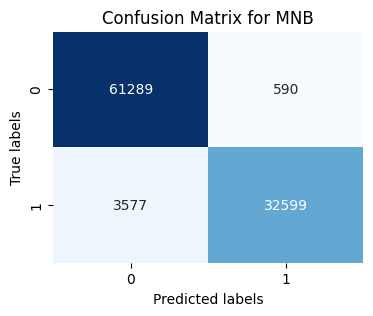

In [34]:
cmMNB = confusion_matrix(y_test, predictMNB)

plt.figure(figsize=(4, 3))
sns.heatmap(cmMNB, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for MNB")
plt.show()

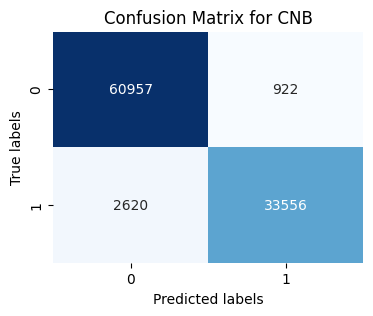

In [36]:
cmCNB = confusion_matrix(y_test, predictCNB)

plt.figure(figsize=(4, 3))
sns.heatmap(cmCNB, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for CNB")
plt.show()

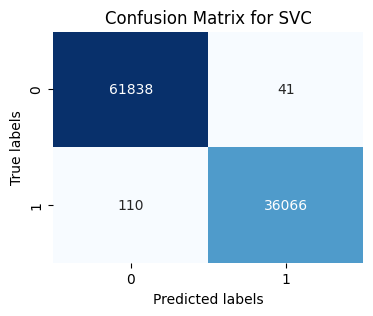

In [37]:
cmSVC = confusion_matrix(y_test, predictSVC)

plt.figure(figsize=(4, 3))
sns.heatmap(cmSVC, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for SVC")
plt.show()

In [42]:
crossMNB = cross_val_score(pipelineMNB, X_train, y_train, cv=5)
print(f"Multinomial Naive Bayes Cross-validated accuracy: {crossMNB.mean():.2f} (+/- {crossMNB.std()*2:.2f})")

Multinomial Naive Bayes Cross-validated accuracy: 0.95 (+/- 0.00)


In [43]:
crossCNB = cross_val_score(pipelineCNB, X_train, y_train, cv=5)
print(f"Complement Naive Bayes Cross-validated accuracy: {crossCNB.mean():.2f} (+/- {crossCNB.std()*2:.2f})")

Complement Naive Bayes Cross-validated accuracy: 0.96 (+/- 0.00)


In [44]:
crossSVC = cross_val_score(pipelineSVC, X_train, y_train, cv=5)
print(f"Support Vector Classifier Cross-validated accuracy: {crossSVC.mean():.2f} (+/- {crossSVC.std()*2:.2f})")

Support Vector Classifier Cross-validated accuracy: 1.00 (+/- 0.00)
